In [255]:
import pandas as pd
import numpy as np

In [256]:
df = pd.read_csv("spam.csv", encoding='ISO-8859–1')

In [257]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
186,ham,"Haha awesome, be there in a minute",NaN,NaN,NaN
1278,ham,Can i meet Ì_ at 5.. As 4 where depends on whe...,NaN,NaN,NaN
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
741,ham,Do well :)all will for little time. Thing of g...,NaN,NaN,NaN
2097,ham,Are you the cutest girl in the world or what,NaN,NaN,NaN


In [258]:
df.shape

(5572, 5)

## 1. Data Cleaning 

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [260]:
#drop last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [261]:
df.sample(5)

,v1,v2
4936,ham,G wants to know where the fuck you are
1323,ham,I thk 50 shd be ok he said plus minus 10.. Did...
861,ham,Your brother is a genius
4805,ham,Call me when u finish then i come n pick u.
799,ham,"\Gimme a few\"" was &lt;#&gt; minutes ago"""


In [262]:
#renaming the cols
df.rename(columns= {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
2393,ham,"Okey doke. I'm at home, but not dressed cos la..."
2322,ham,Should I be stalking u?
4721,ham,"I'm home, my love ... If your still awake ... ..."
2428,ham,She.s find. I sent you an offline message to k...
2845,ham,Wat time u finish ur lect today?


In [263]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [264]:
df['target'] = encoder.fit_transform(df['target'])

In [265]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [266]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [267]:
#check for duplicate values
df.duplicated().sum()

403

In [268]:
#remove duplicate values
df = df.drop_duplicates(keep = 'first')

In [269]:
df.duplicated().sum()

0

In [270]:
df.shape

(5169, 2)

## 2. EDA 
exploratory data analysis ???

In [271]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

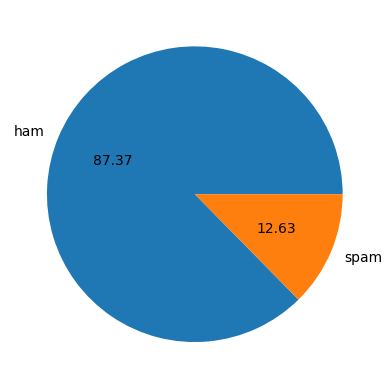

In [272]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [273]:
#data is imbalanced
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

making three new columns for number of characters, number of sentences and number of words

In [274]:
#number of characters
df['num_char'] =df['text'].apply(len)

In [275]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [276]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [277]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [278]:
#number of sentenes
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [279]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [280]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [281]:
#ham
df[df['target'] == 0][['num_char','num_words' ,'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [282]:
#spam
df[df['target'] == 1][['num_char','num_words' ,'num_sentences']].describe()


,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [283]:
#plotting a histogram for spam and ham
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

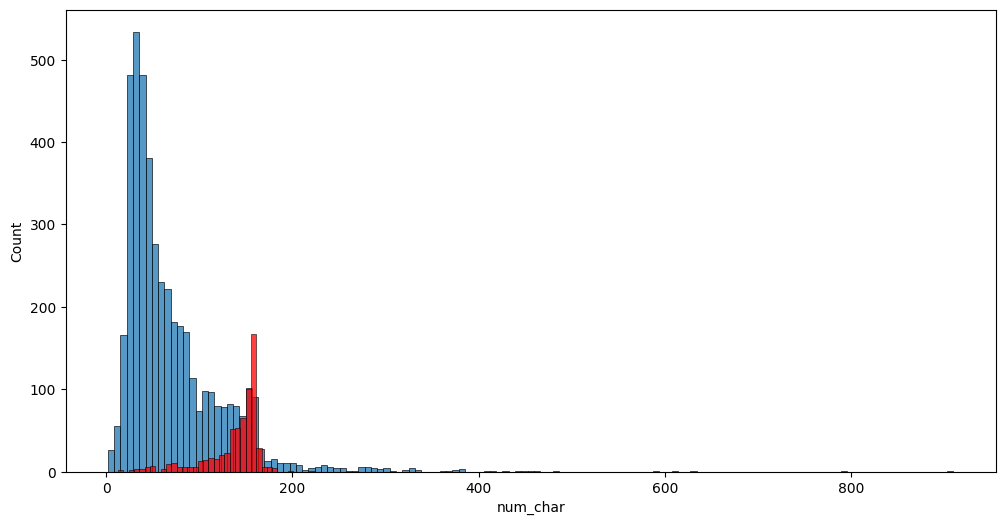

In [284]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] ==0]['num_char']) #ham
sns.histplot(df[df['target'] ==1]['num_char'], color = 'red') #spam 

spam are using more number of characters than ham

<AxesSubplot:xlabel='num_words', ylabel='Count'>

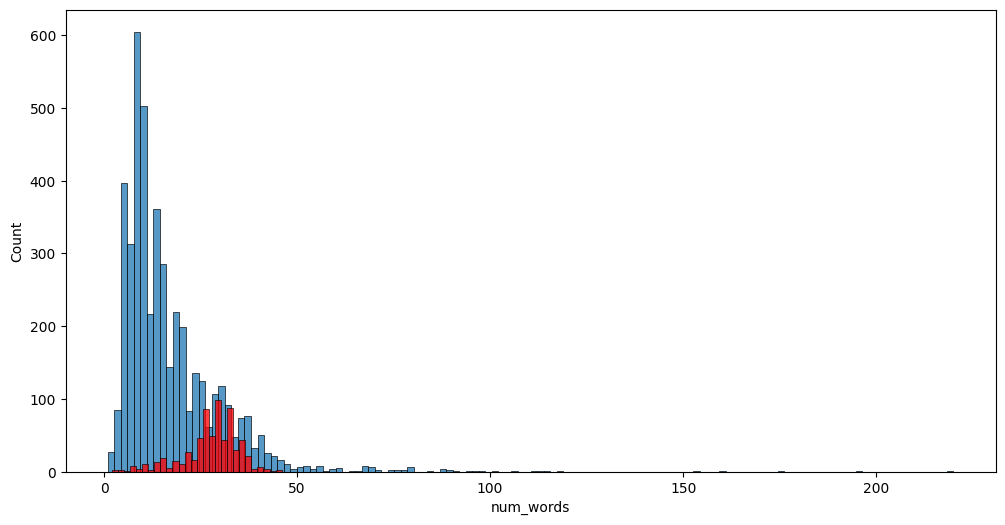

In [285]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] ==0]['num_words']) #ham
sns.histplot(df[df['target'] ==1]['num_words'], color = 'red') #spam 

also the spam are made of more words than ham 

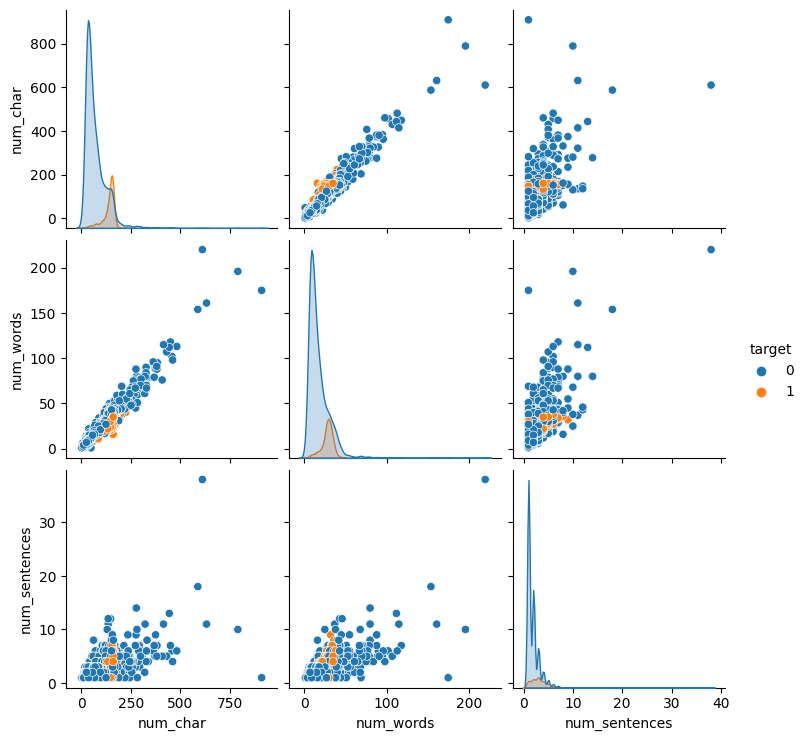

In [286]:
#to know the relationship between the columns
sns.pairplot(df, hue = 'target')

data contains outliers

<AxesSubplot:>

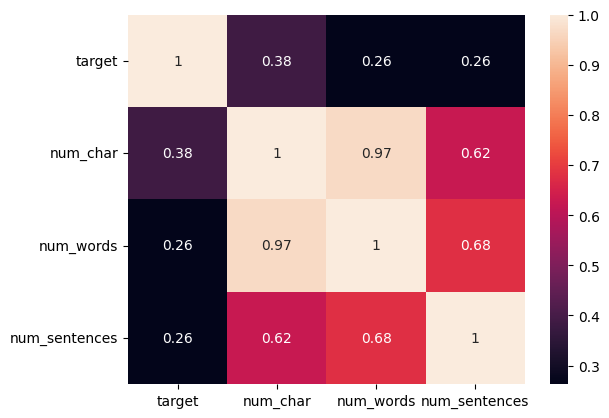

In [287]:
sns.heatmap(df.corr(), annot = True)

0.62, 0.68 , 0.68 are high correlation with each other so will take only one column among num_words, num_sentences and num_char
--that is num_char
cannot take all three due to high colliniarity

# 3. Data Preprocessing
- Lowercase 
- tokenisation
- removing special characters
- removing stop words and punchuations
- stemming 
    

In [288]:
from nltk.corpus import stopwords
import string
# string.punctuation
# stopwords.words('english')

In [289]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [290]:
def transform_text(text):
    text = text.lower() #convert to lowercase
    text = nltk.word_tokenize(text) #create a list of all the words

    y = [] #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i  not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text: y.append(ps.stem(i))

    return " ".join(y)

In [291]:
transform_text('i loves the YT leactures on MAchine Learning. HOw about you')

'love yt leactur machin learn'

In [292]:
df['transformed_text'] = df['text'].apply(transform_text)

In [293]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


word cloud of ham and spam

In [294]:
from wordcloud import WordCloud
wc =  WordCloud(width = 500, height = 500, min_font_size= 10, background_color='white')

In [295]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

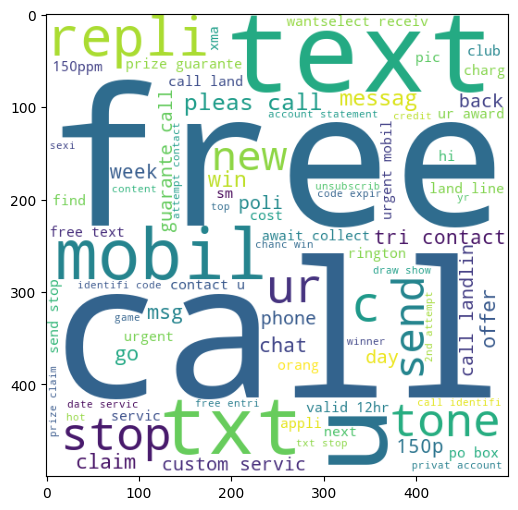

In [296]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [297]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

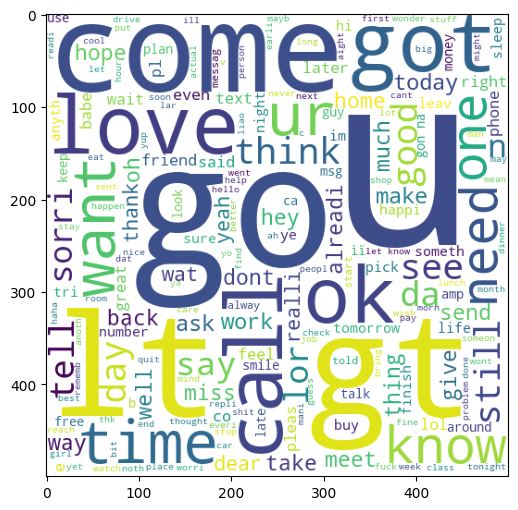

In [298]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

top 30 words of both ham and spam messages

In [299]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [300]:
#spam messages
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for words in msg.split(): #splittin all the words of the message
        spam_corpus.append(words) 

In [301]:
len(spam_corpus)

9939

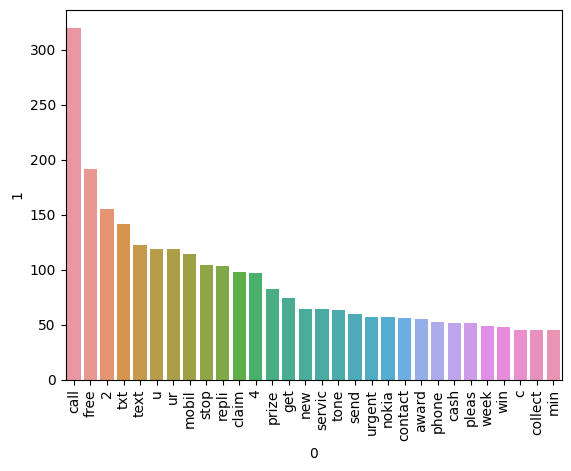

In [302]:
from collections import Counter
#these are the most common thirty words in the dataset 
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [303]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split(): #splittin all the words of the message
        ham_corpus.append(words) 

In [304]:
len(ham_corpus)

35404

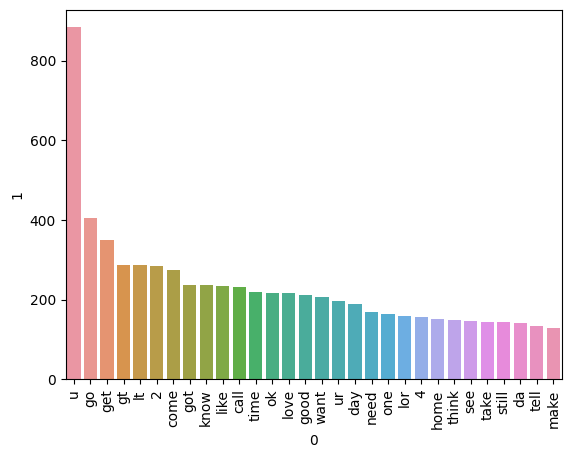

In [305]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

generally on textual data Naiva Base gives best data

since ml model takes numerical input hence we have to vectorise the data 
using bag of words

In [306]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv =CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [307]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [308]:
X.shape

(5169, 3000)

In [309]:
y = df['target'].values

In [310]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [313]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [314]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [315]:
#Gaussian NB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [316]:
#multinomial NB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [317]:
# bernoulli NB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


precision score matters more here 
as data is imbalanced 
tfidf ---> MNB

comparing the result of the mnb with other models

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [319]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth =5)
lrc = LogisticRegression(solver = 'liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state  = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)


In [320]:
#a dictionary of all the models
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [321]:
def train_Classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [322]:
train_Classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [323]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_Classifier(clf, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [324]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)

In [325]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.930368,0.817308


In [326]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [327]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.930368


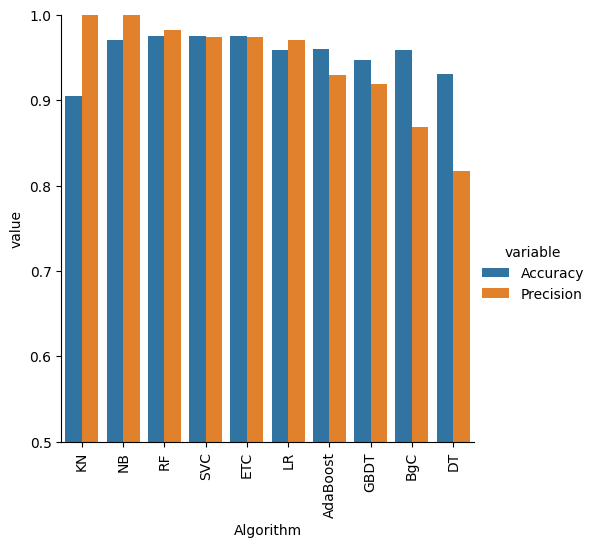

In [328]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()


improving model
1. change the max_features parameter of tfidf

In [343]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [342]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [344]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [345]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [346]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [347]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308


voting classifier

In [349]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability= True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [350]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [351]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [352]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [353]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [354]:
from sklearn.ensemble import StackingClassifier

In [355]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [359]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


Pickling the model

In [358]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))